In [2]:
%load_ext gvmagic

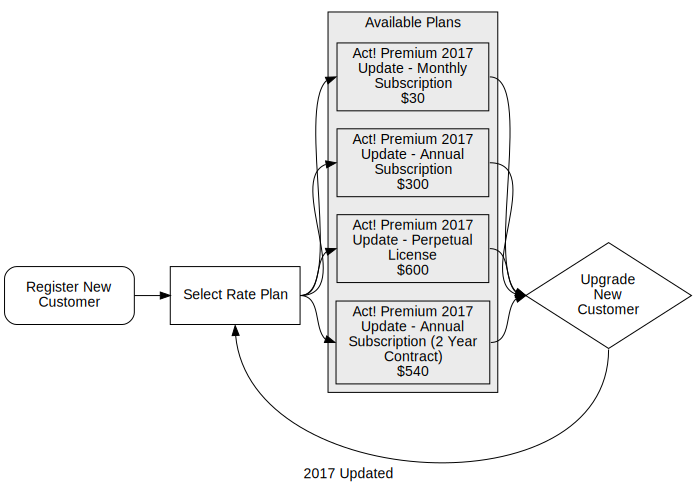

In [3]:
%%dot

digraph apply {
    label="2017 Updated"
    rankdir=LR; fontname=Helvetica
    node[fontname=Helvetica,width=1.8,height=0.8]
    edge[fontname=Helvetica,fontsize=12,fontcolor=blue,labeldistance=1.8]
    
    start [shape=box, style=rounded, label="Register New\nCustomer"];
    selectrp[shape="box", label="Select Rate Plan"];

    subgraph cluster_available_plans {
        label="Available Plans"
        style=filled; fillcolor=grey92
        rank=same;
        monthly    [shape=box, label="Act! Premium 2017\nUpdate - Monthly\nSubscription\n$30"]
        annual     [shape=box, label="Act! Premium 2017\nUpdate - Annual\nSubscription\n$300"]
        perpetual  [shape=box, label="Act! Premium 2017\nUpdate - Perpetual\nLicense\n$600"]
        year2      [shape=box, label="Act! Premium 2017\nUpdate - Annual\nSubscription (2 Year\nContract)\n$540"]
    }

    upgrade[shape="diamond", label="Upgrade\nNew\nCustomer", rank=min];

    node [shape = box];
    {
        start->selectrp->upgrade [color=invis];
        rankdir=LR;
    }

    start:e -> selectrp:w
    selectrp:e -> monthly:w
    selectrp:e -> annual:w
    selectrp:e-> perpetual:w
    selectrp:e -> year2:w
    monthly:e -> upgrade:w
    annual:e -> upgrade:w
    perpetual:e -> upgrade:w
    year2:e -> upgrade:w
    upgrade:s -> selectrp:s
}

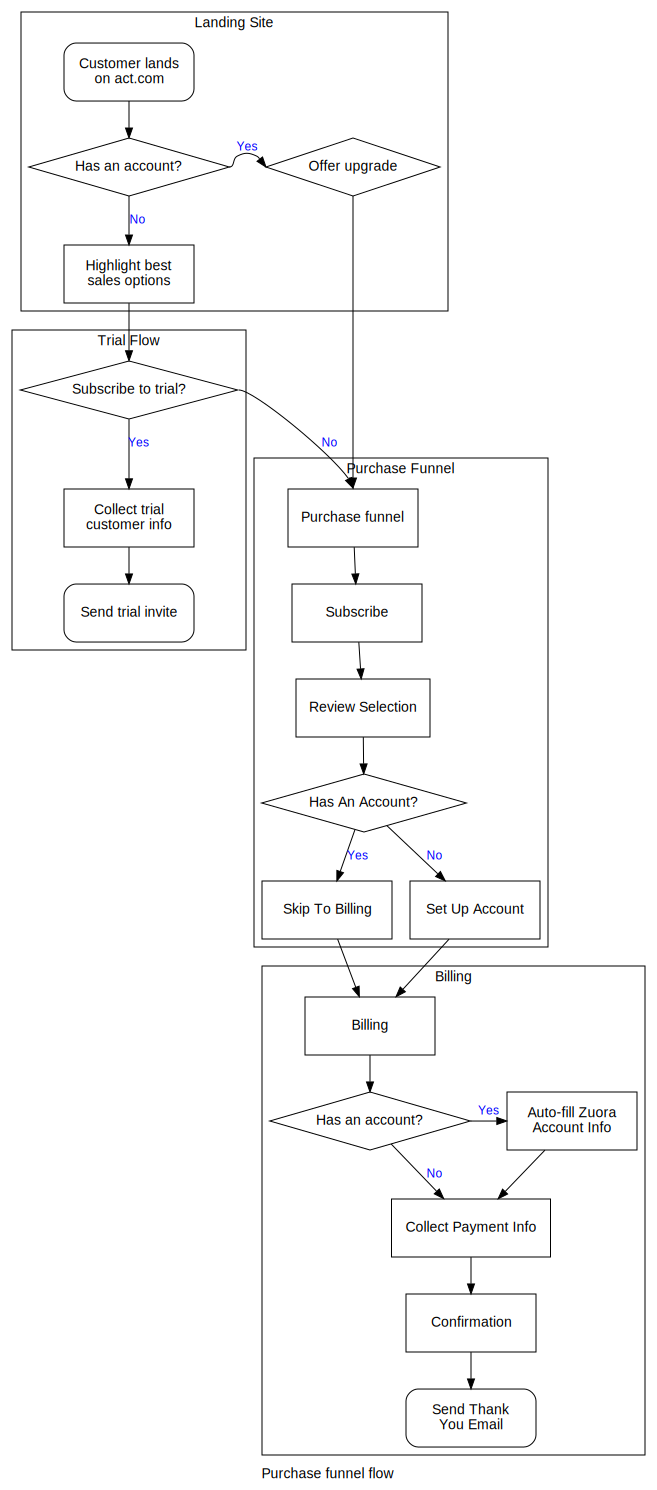

In [5]:
%%dot

digraph apply {
    label="Purchase funnel flow"
    rankdir=TB; fontname=Helvetica
    node[fontname=Helvetica,width=1.8,height=0.8]
    edge[fontname=Helvetica,fontsize=12,fontcolor=blue,labeldistance=1.8]

    subgraph cluster_landing_site {
        label="Landing Site"
        start [href="Good%20UX%20Intro.ipynb#Layout", shape=box, style=rounded, label="Customer lands\non act.com"]
        {
            rank=same
            hasaccount[shape="diamond", label="Has an account?"];
            upgrade[shape="diamond", label="Offer upgrade"];
        }
        
        highlight[shape="box", label="Highlight best\nsales options"];
        
        
        
        start:s -> hasaccount:n
        hasaccount:e -> upgrade:w[label="Yes"]
        hasaccount:s -> highlight:n[label="No"]
    }

    subgraph cluster_trial_flow {
        label="Trial Flow"
        rankdir=TB; rank=same

        trialemail[shape="box", style="rounded", label="Send trial invite"]
        trialinfo[shape="box", label="Collect trial\ncustomer info"]
        trial[shape="diamond", label="Subscribe to trial?"];

        highlight -> trial
        trial -> trialinfo[label="Yes"]
        trialinfo -> trialemail
    }
    
    subgraph cluster_purchase_funnel {
        label="Purchase Funnel"
        
        upgrade:s -> funnel:n
        trial:e -> funnel:n[label="No"]
        
        funnel[shape="box", label="Purchase funnel"];
        subscribe [shape=box, label="Subscribe"]
        review [shape=box, label="Review Selection"]
        hasaccount2 [shape=diamond, label="Has An Account?"]
        skiptobilling [shape=box, label="Skip To Billing"]
        setupaccount [shape=box, label="Set Up Account"]
        
        funnel -> subscribe
        subscribe -> review
        review -> hasaccount2
        hasaccount2 -> setupaccount [label="No"]
        hasaccount2 -> skiptobilling [label="Yes"]
    }
    
    subgraph cluster_billing {
        label="Billing"

        setupaccount -> billing
        skiptobilling -> billing
        
        billing [shape="box", label="Billing"]
        {
            rank=same;
            hasaccount3 [shape=diamond, label="Has an account?"]
            autofill [shape=box, label="Auto-fill Zuora\nAccount Info"]
        }
        collectpayment [shape=box, label="Collect Payment Info"]
        confirm [shape=box, label="Confirmation"]
        thanksemail [shape=box, style=rounded, label="Send Thank\nYou Email"]
        
        billing -> hasaccount3
        hasaccount3 -> autofill [label="Yes"]
        autofill -> collectpayment
        hasaccount3 -> collectpayment [label="No"]
        collectpayment -> confirm
        confirm -> thanksemail
    }

}

In [155]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>